# Cargamos las librerías básicas.
Esto será común a todos los cuadernos de este proyecto.
- Se cargan las librerías básicas
    - os
    - subprocess
    - re
    - numpy as np
    - pandas as pd
    - csv
    - string # Para usar punctuation y eliminar los signos de puntuación
    - seaborn as sns
    - matplotlib as plt
    - ast # Para poder evaluar listas
    - spacy
    - tensorflow
    - displacy
    - train_test_split
- Se importan los modelos
    - SVC
    - RandomForestClassifier
- Se cargan las Stop Words
- Se carga del diccionario de NLP en_core_web_lg

In [23]:
!source odio_env/bin/activate

In [3]:
# Las importaciones (se harán en cada archivo de esta serie)
%run "import.py"

2023-11-11 11:04:35.645632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Leemos el dataset en su estado actual
df = pd.read_json('data/02_Tokenizados_y_lematizados.json', orient='split')
df

Tokenized_Comments  \
0    [people, step, case, ,, people, situation, ., ...   
1    [Law, enforcement, trained, shoot, apprehend, ...   
2    [nt, reckon, ', black, lives, matter, ', banne...   
3    [large, number, people, like, police, officers...   
4    [Arab, dude, absolutely, right, ,, shot, 6, ex...   
..                                                 ...   
995                [remember, sent, national, defence]   
996  [Stats, don`t, represent, problem, ., Race, ba...   
997  [quote, mother, ..., Wow, hit, hard, ., accura...   
998                                    [video, racist]   
999              [God, ,, narrator, annoying, lisp, .]   

                                    Lematized_comments  IsToxic  IsAbusive  \
0    [people, step, case, ,, people, situation, ., ...        0          0   
1    [law, enforcement, train, shoot, apprehend, .,...        1          1   
2    [not, reckon, ', black, life, matter, ', banne...        1          1   
3    [large, number, people, like, police, officer,...        0          0   
4    [arab, dude, absolutely, right, ,, shoot, 6, e...        0          0   
..                                                 ...      ...        ...   
995                [remember, send, national, defence]        0          0   
996  [stat, don`t, represent, problem, ., race, bai...        1          0   
997  [quote, mother, ..., wow, hit, hard, ., accura...        0          0   
998                                    [video, racist]        0          0   
999              [God, ,, narrator, annoying, lisp, .]        0          0   

     IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  \
0           0              0          0             0         0   
1           0              0          0             0         0   
2           0              0          1             0         0   
3           0              0          0             0         0   
4           0              0          0             0         0   
..        ...            ...        ...           ...       ...   
995         0              0          0             0         0   
996         0              0          0             1         1   
997         0              0          0             0         0   
998         0              0          0             0         0   
999         0              0          0             0         0   

     IsNationalist  IsSexist  IsHomophobic  IsReligiousHate  IsRadicalism  \
0                0         0             0                0             0   
1                0         0             0                0             0   
2                0         0             0                0             0   
3                0         0             0                0             0   
4                0         0             0                0             0   
..             ...       ...           ...              ...           ...   
995              0         0             0                0             0   
996              0         0             0                0             0   
997              0         0             0                0             0   
998              0         0             0                0             0   
999              0         0             0                0             0   

     IsHate  
0         0  
1         1  
2         1  
3         0  
4         0  
..      ...  
995       0  
996       1  
997       0  
998       0  
999       0  

[1000 rows x 15 columns]

# EDA

### Empezamos por ver las columnas que están balanceadas y las que no

In [5]:
columnas_booleanas = [
    'IsToxic', 
    'IsAbusive', 
    'IsThreat',
    'IsProvocative',
    'IsObscene',
    'IsHatespeech',
    'IsRacist',
    'IsNationalist',
    'IsSexist',
    'IsHomophobic',
    'IsReligiousHate',
    'IsRadicalism'
]

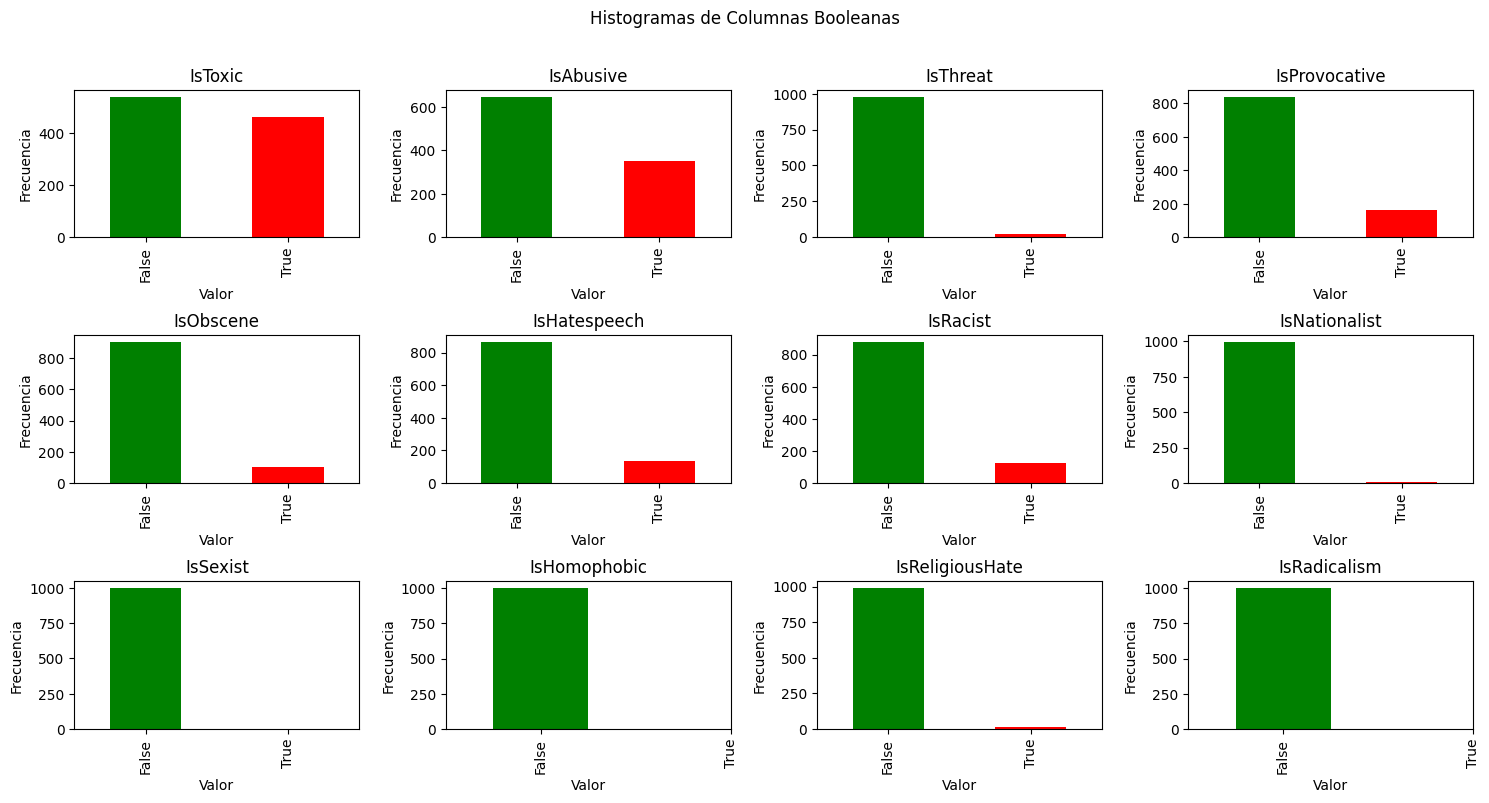

In [6]:
# Ajusta la cantidad de subplots por fila y columna según tus preferencias
filas = 4
columnas = 4
fig, axs = plt.subplots(filas, columnas, figsize=(15, 10))
fig.suptitle("Histogramas de Columnas Booleanas")

for i, columna in enumerate(columnas_booleanas):
    fila_actual = i // columnas
    columna_actual = i % columnas
    ax = axs[fila_actual, columna_actual]
    
    # Crea un histograma para la columna booleana actual
    counts = df[columna].value_counts()
    counts.plot(kind='bar', ax=ax, color=['g', 'r'])  # Asigna el color verde a 0 y el color rojo a 1
    
    ax.set_title(columna)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')
    
    # Establece manualmente las ubicaciones y etiquetas del eje x
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['False', 'True'])

# Elimina los subplots vacíos, si los hay
for i in range(len(columnas_booleanas), filas * columnas):
    fila_actual = i // columnas
    columna_actual = i % columnas
    fig.delaxes(axs[fila_actual, columna_actual])

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### Determinamos la cantidad de mensajes de odio que hay por cada categoría

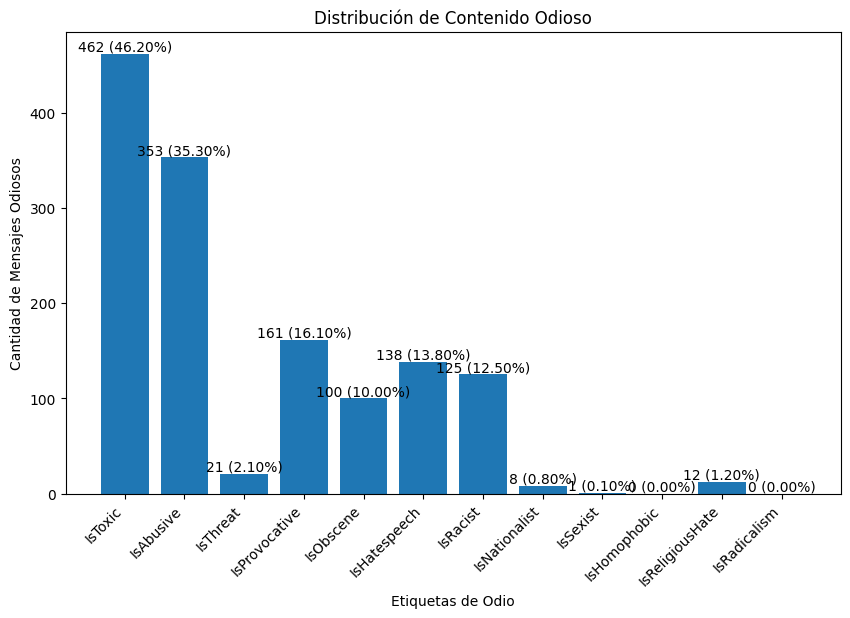

In [7]:
# Calcula la cantidad de mensajes etiquetados como odiosos para cada etiqueta
cantidad_odio = [df[etiqueta].sum() for etiqueta in columnas_booleanas]

# Calcula el porcentaje de mensajes odiosos
total_filas = len(df)
porcentaje_odio = [(cantidad / total_filas) * 100 for cantidad in cantidad_odio]

# Configura la ubicación de las etiquetas en el eje x
x = range(len(columnas_booleanas))

# Crea el gráfico de barras grupales
plt.figure(figsize=(10, 6))
plt.bar(x, cantidad_odio)
plt.xticks(x, columnas_booleanas, rotation=45, ha="right")
plt.title("Distribución de Contenido Odioso")
plt.xlabel("Etiquetas de Odio")
plt.ylabel("Cantidad de Mensajes Odiosos")

# Agrega las cifras (porcentaje) encima de las barras
for i, cantidad in enumerate(cantidad_odio):
    plt.text(i, cantidad, f"{cantidad} ({porcentaje_odio[i]:.2f}%)", ha="center", va="bottom")

plt.show()

### Longitud de comentarios en palabras

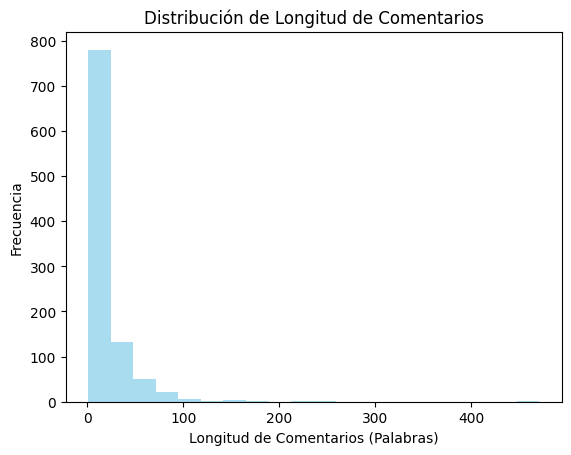

In [8]:
# Calcula la longitud de los comentarios en palabras
df['Comment_Length'] = df['Tokenized_Comments'].apply(len)
length = df['Comment_Length']
try:
    df.drop(['Comment_Length'], axis=1, inplace=True)
except:
    pass
try:
    df.insert(1, "Commnets_Length", length)
except:
    pass

# Crea un histograma para visualizar la distribución
plt.hist(df['Commnets_Length'], bins=20, color='skyblue', alpha=0.7)
plt.title('Distribución de Longitud de Comentarios')
plt.xlabel('Longitud de Comentarios (Palabras)')
plt.ylabel('Frecuencia')
plt.show()

In [9]:
df

Tokenized_Comments  Commnets_Length  \
0    [people, step, case, ,, people, situation, ., ...              122   
1    [Law, enforcement, trained, shoot, apprehend, ...               16   
2    [nt, reckon, ', black, lives, matter, ', banne...               44   
3    [large, number, people, like, police, officers...               52   
4    [Arab, dude, absolutely, right, ,, shot, 6, ex...               26   
..                                                 ...              ...   
995                [remember, sent, national, defence]                4   
996  [Stats, don`t, represent, problem, ., Race, ba...               29   
997  [quote, mother, ..., Wow, hit, hard, ., accura...                9   
998                                    [video, racist]                2   
999              [God, ,, narrator, annoying, lisp, .]                6   

                                    Lematized_comments  IsToxic  IsAbusive  \
0    [people, step, case, ,, people, situation, ., ...        0          0   
1    [law, enforcement, train, shoot, apprehend, .,...        1          1   
2    [not, reckon, ', black, life, matter, ', banne...        1          1   
3    [large, number, people, like, police, officer,...        0          0   
4    [arab, dude, absolutely, right, ,, shoot, 6, e...        0          0   
..                                                 ...      ...        ...   
995                [remember, send, national, defence]        0          0   
996  [stat, don`t, represent, problem, ., race, bai...        1          0   
997  [quote, mother, ..., wow, hit, hard, ., accura...        0          0   
998                                    [video, racist]        0          0   
999              [God, ,, narrator, annoying, lisp, .]        0          0   

     IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  \
0           0              0          0             0         0   
1           0              0          0             0         0   
2           0              0          1             0         0   
3           0              0          0             0         0   
4           0              0          0             0         0   
..        ...            ...        ...           ...       ...   
995         0              0          0             0         0   
996         0              0          0             1         1   
997         0              0          0             0         0   
998         0              0          0             0         0   
999         0              0          0             0         0   

     IsNationalist  IsSexist  IsHomophobic  IsReligiousHate  IsRadicalism  \
0                0         0             0                0             0   
1                0         0             0                0             0   
2                0         0             0                0             0   
3                0         0             0                0             0   
4                0         0             0                0             0   
..             ...       ...           ...              ...           ...   
995              0         0             0                0             0   
996              0         0             0                0             0   
997              0         0             0                0             0   
998              0         0             0                0             0   
999              0         0             0                0             0   

     IsHate  
0         0  
1         1  
2         1  
3         0  
4         0  
..      ...  
995       0  
996       1  
997       0  
998       0  
999       0  

[1000 rows x 16 columns]

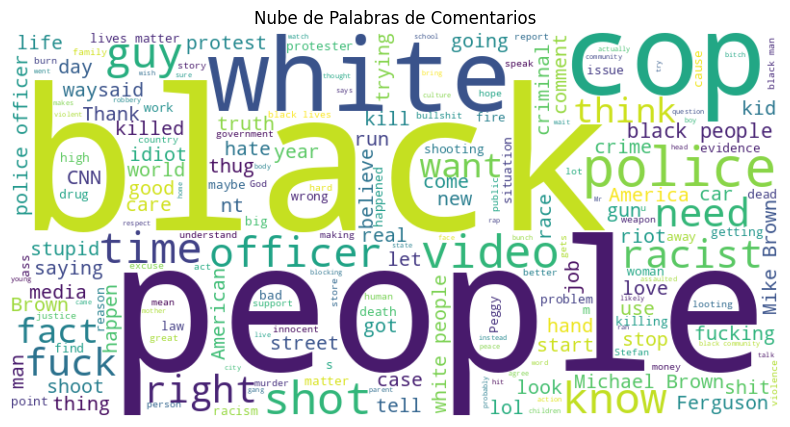

In [10]:
# Concatena todos los comentarios en una cadena
all_comments = ' '.join(df['Tokenized_Comments'].apply(lambda x: ' '.join(x)))

# Crea una nube de palabras con las palabras más frecuentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Comentarios')
plt.show()

In [11]:
# Función para obtener n-gramas más frecuentes
def get_ngrams(text, n):
    n_grams = ngrams(text, n)
    return [' '.join(gram) for gram in n_grams]

# Obtén los bigramas y trigramas más frecuentes
bigrams = get_ngrams(all_comments.split(), 2)
trigrams = get_ngrams(all_comments.split(), 3)

# Calcula la frecuencia de los bigramas y trigramas
freq_bigrams = FreqDist(bigrams)
freq_trigrams = FreqDist(trigrams)

# Muestra los bigramas y trigramas más frecuentes
print('Bigramas más frecuentes:')
print(freq_bigrams.most_common(10))
print('\nTrigramas más frecuentes:')
print(freq_trigrams.most_common(10))

Bigramas más frecuentes:
[('! !', 108), ('? ?', 61), ('black people', 38), (', ,', 35), ('. ,', 30), ('white people', 28), ('Michael Brown', 27), ('. people', 25), ('police officer', 23), ('people .', 20)]

Trigramas más frecuentes:
[('! ! !', 54), ('? ? ?', 33), (', , ,', 18), ('black lives matter', 8), ('. Michael Brown', 8), ('white people .', 7), (', etc .', 6), ('. Mike Brown', 4), ('. black people', 4), ('black community .', 4)]


## Un diagrama de correlaciones entre datos

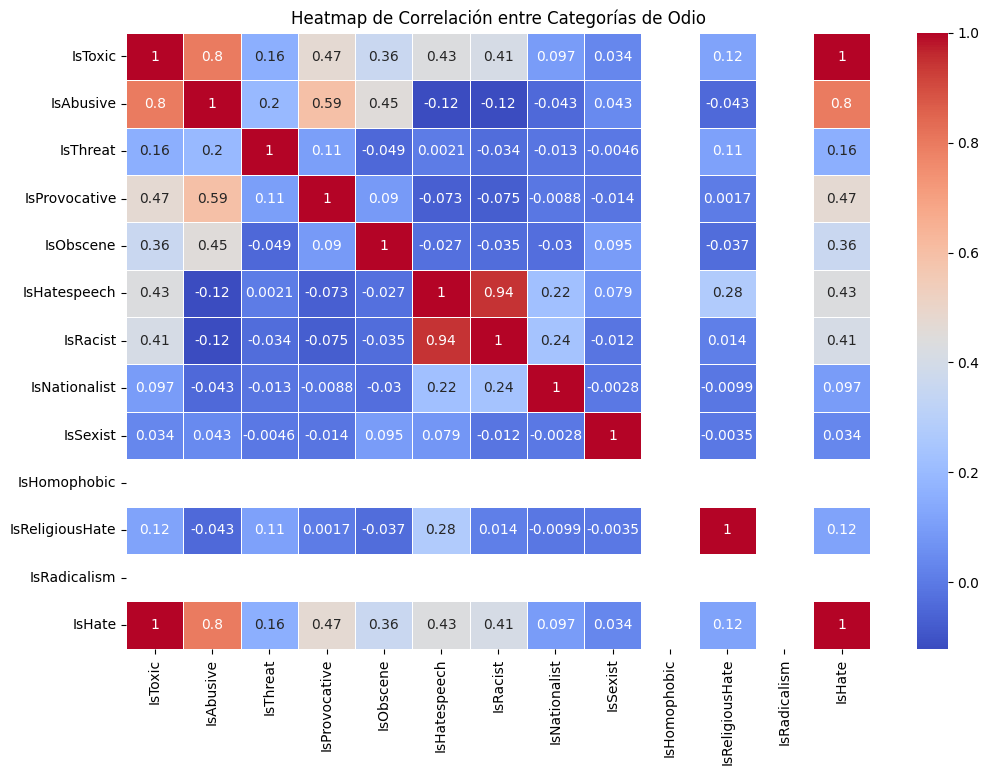

In [12]:
# Crear un dataframe de correlación
correlation_matrix = df[['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism', 'IsHate']].corr()

# Crear un heatmap de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap de Correlación entre Categorías de Odio')
plt.show()

## Las palabras más comunes en los comentarios

/var/folders/5x/c_4495r56zddt68nk8rn3vfc0000gn/T/ipykernel_2724/4094930885.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words], palette='viridis')


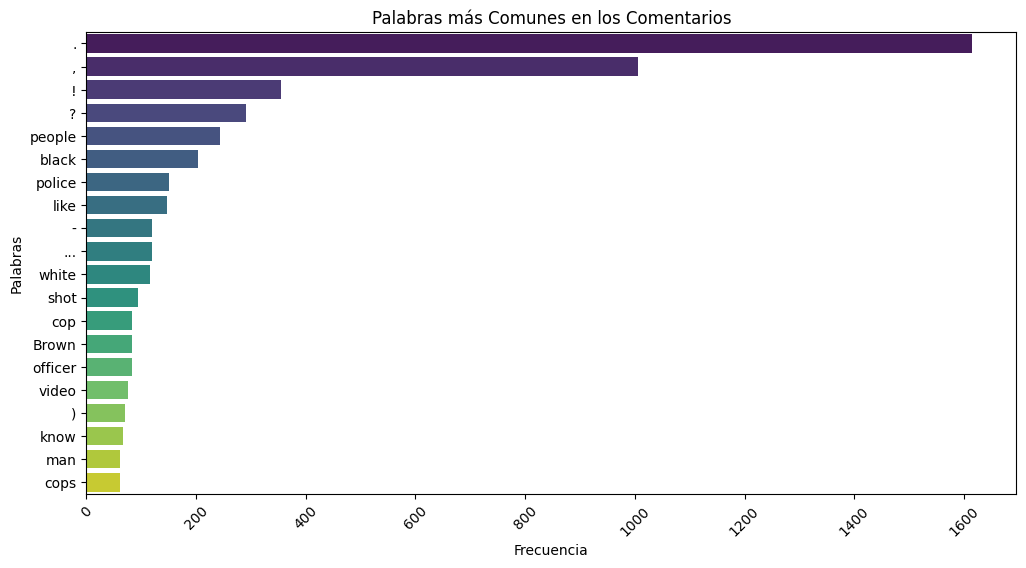

In [13]:
# Obtener las palabras más comunes en los comentarios
word_counts = Counter(' '.join([' '.join(tokens) for tokens in df['Tokenized_Comments']]).split())
most_common_words = word_counts.most_common(20)

# Crear un gráfico de barras de las palabras más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words], palette='viridis')
plt.title('Palabras más Comunes en los Comentarios')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.xticks(rotation=45)
plt.show()

# Los signos de puntuación
Vemos que las "palabras" más comunes son signos de puntuación, que no aportan un contenido real. Lo que hacemos a continuación es eliminarlos, y volver a sacar una gráfica de las palabras más comunes "reales". 

In [14]:
# Función para eliminar signos de puntuación de un texto tokenizado
def remove_punctuation(tokens):
    return [token for token in tokens if token not in string.punctuation]

# Aplicar la función para eliminar signos de puntuación a las columnas existentes
df['Tokenized_Comments'] = df['Tokenized_Comments'].apply(remove_punctuation)
df['Lematized_comments'] = df['Lematized_comments'].apply(remove_punctuation)

/var/folders/5x/c_4495r56zddt68nk8rn3vfc0000gn/T/ipykernel_2724/4094930885.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words], palette='viridis')


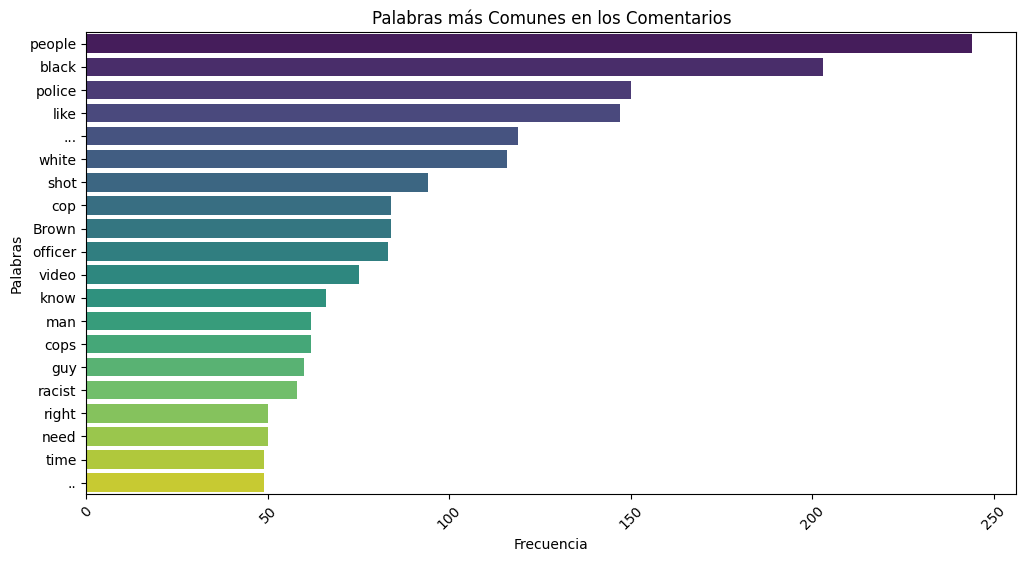

In [15]:
# Obtener las palabras más comunes en los comentarios
word_counts = Counter(' '.join([' '.join(tokens) for tokens in df['Tokenized_Comments']]).split())
most_common_words = word_counts.most_common(20)

# Crear un gráfico de barras de las palabras más comunes
plt.figure(figsize=(12, 6))
sns.barplot(x=[word[1] for word in most_common_words], y=[word[0] for word in most_common_words], palette='viridis')
plt.title('Palabras más Comunes en los Comentarios')
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.xticks(rotation=45)
plt.show()

In [16]:
df

Tokenized_Comments  Commnets_Length  \
0    [people, step, case, people, situation, lump, ...              122   
1    [Law, enforcement, trained, shoot, apprehend, ...               16   
2    [nt, reckon, black, lives, matter, banners, he...               44   
3    [large, number, people, like, police, officers...               52   
4    [Arab, dude, absolutely, right, shot, 6, extra...               26   
..                                                 ...              ...   
995                [remember, sent, national, defence]                4   
996  [Stats, don`t, represent, problem, Race, baiti...               29   
997     [quote, mother, ..., Wow, hit, hard, accurate]                9   
998                                    [video, racist]                2   
999                    [God, narrator, annoying, lisp]                6   

                                    Lematized_comments  IsToxic  IsAbusive  \
0    [people, step, case, people, situation, lump, ...        0          0   
1    [law, enforcement, train, shoot, apprehend, tr...        1          1   
2    [not, reckon, black, life, matter, banner, hol...        1          1   
3    [large, number, people, like, police, officer,...        0          0   
4    [arab, dude, absolutely, right, shoot, 6, extr...        0          0   
..                                                 ...      ...        ...   
995                [remember, send, national, defence]        0          0   
996  [stat, don`t, represent, problem, race, bait, ...        1          0   
997     [quote, mother, ..., wow, hit, hard, accurate]        0          0   
998                                    [video, racist]        0          0   
999                    [God, narrator, annoying, lisp]        0          0   

     IsThreat  IsProvocative  IsObscene  IsHatespeech  IsRacist  \
0           0              0          0             0         0   
1           0              0          0             0         0   
2           0              0          1             0         0   
3           0              0          0             0         0   
4           0              0          0             0         0   
..        ...            ...        ...           ...       ...   
995         0              0          0             0         0   
996         0              0          0             1         1   
997         0              0          0             0         0   
998         0              0          0             0         0   
999         0              0          0             0         0   

     IsNationalist  IsSexist  IsHomophobic  IsReligiousHate  IsRadicalism  \
0                0         0             0                0             0   
1                0         0             0                0             0   
2                0         0             0                0             0   
3                0         0             0                0             0   
4                0         0             0                0             0   
..             ...       ...           ...              ...           ...   
995              0         0             0                0             0   
996              0         0             0                0             0   
997              0         0             0                0             0   
998              0         0             0                0             0   
999              0         0             0                0             0   

     IsHate  
0         0  
1         1  
2         1  
3         0  
4         0  
..      ...  
995       0  
996       1  
997       0  
998       0  
999       0  

[1000 rows x 16 columns]

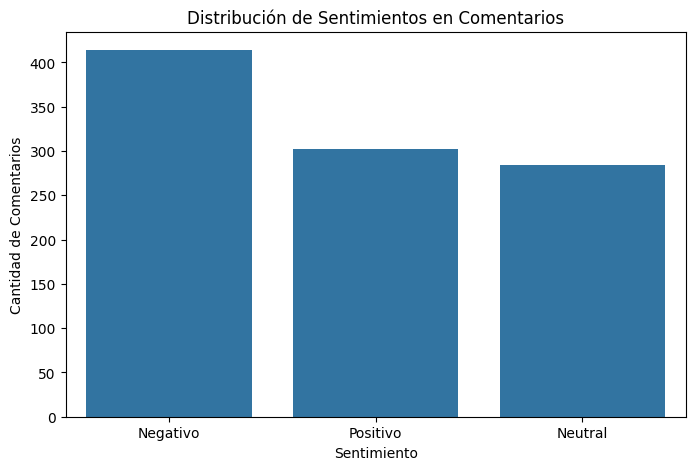

In [17]:
def sentiment_analysis(text):
    # Convertir la lista de palabras en una cadena
    text_str = ' '.join(text)
    
    analysis = TextBlob(text_str)
    
    # Clasificar la polaridad del sentimiento
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negativo'

# Aplicar la función a tus comentarios y crear una nueva columna
df['Sentiment'] = df['Lematized_comments'].apply(sentiment_analysis)

# Contar la cantidad de comentarios en cada categoría de sentimiento
sentiment_counts = df['Sentiment'].value_counts()

# Visualizar la distribución de sentimientos
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values)
plt.title('Distribución de Sentimientos en Comentarios')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Comentarios')
plt.show()

# Nube de palabras por cada categoría de odio

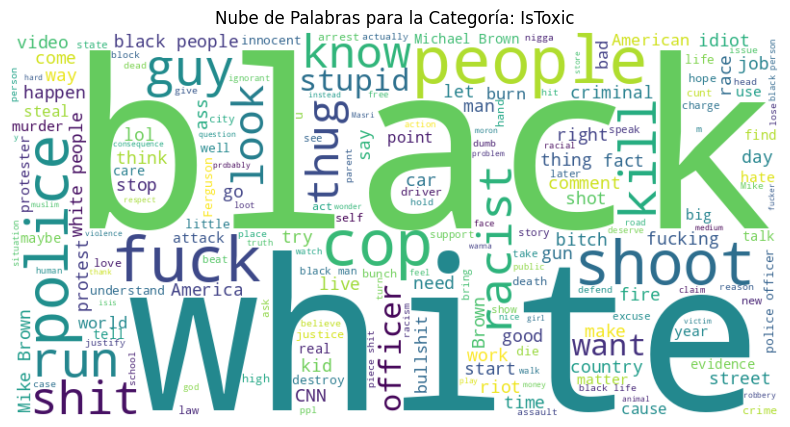

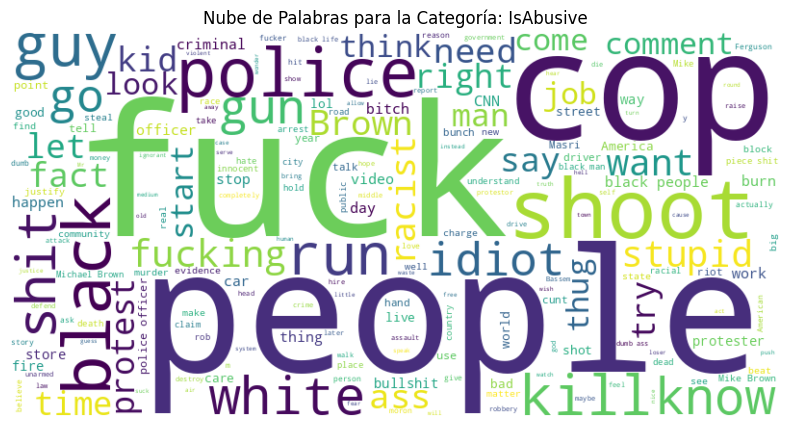

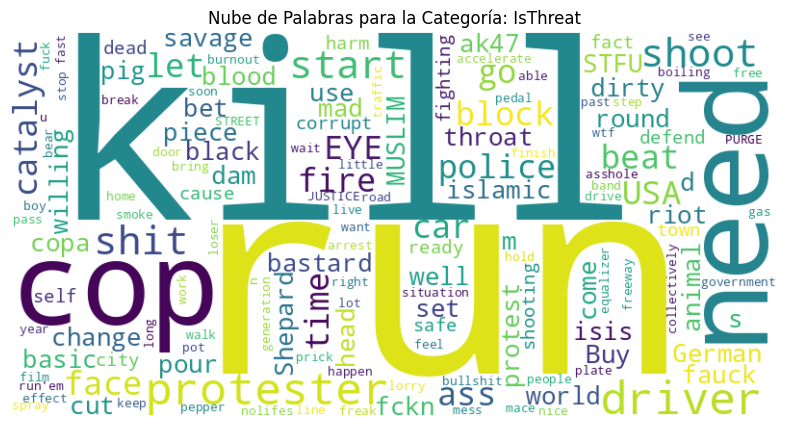

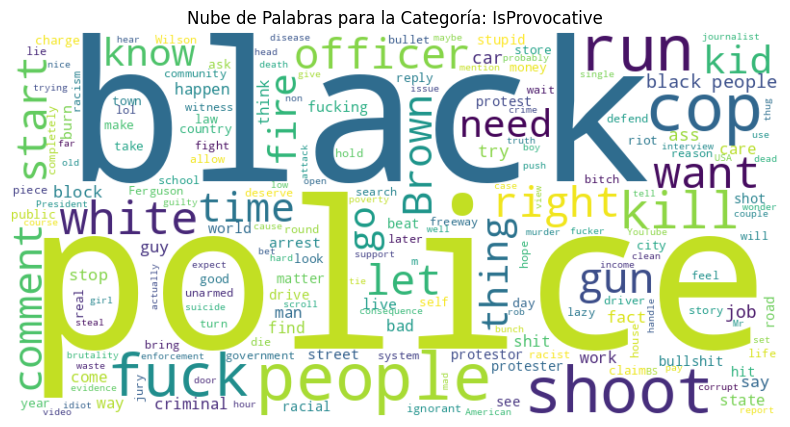

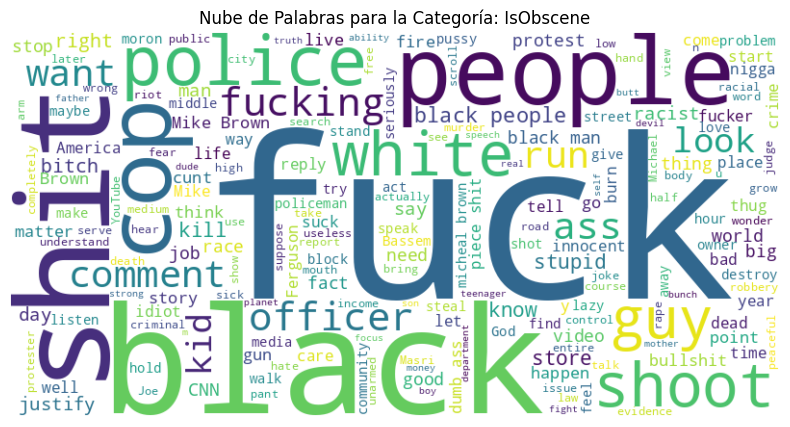

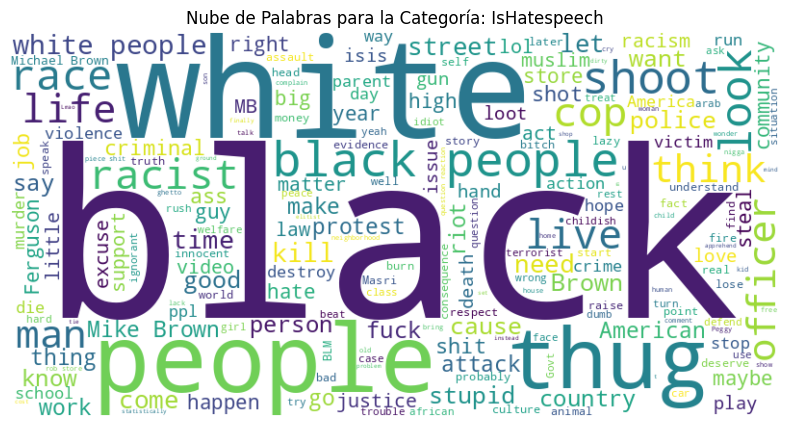

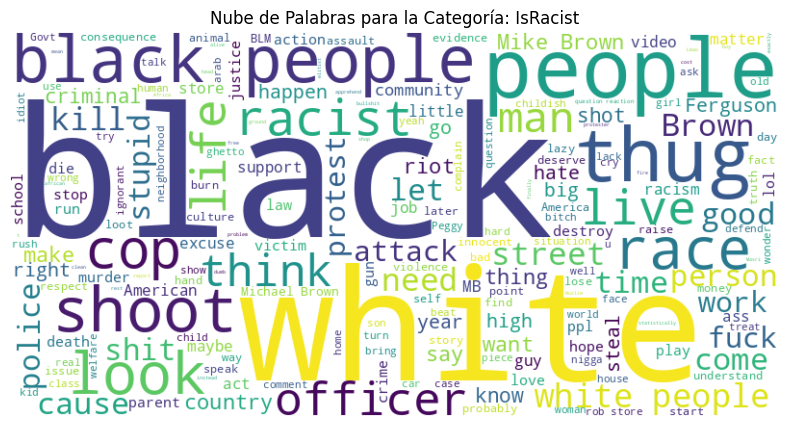

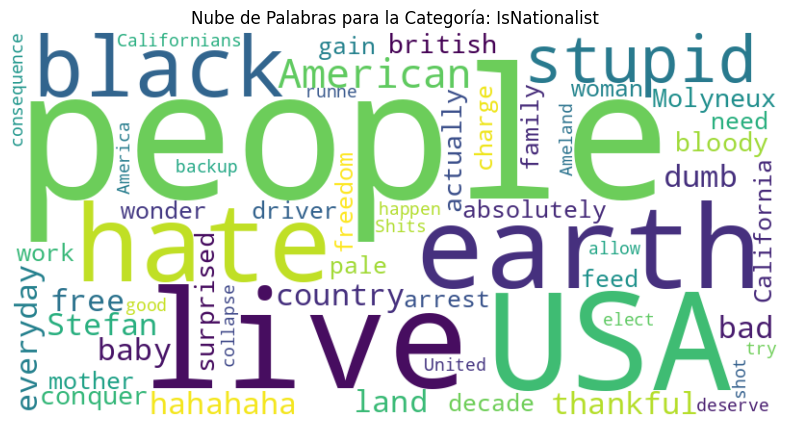

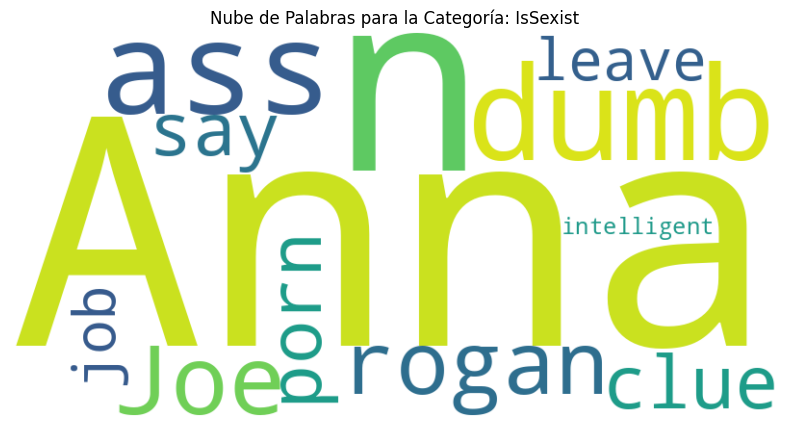

No hay datos para la categoría IsHomophobic


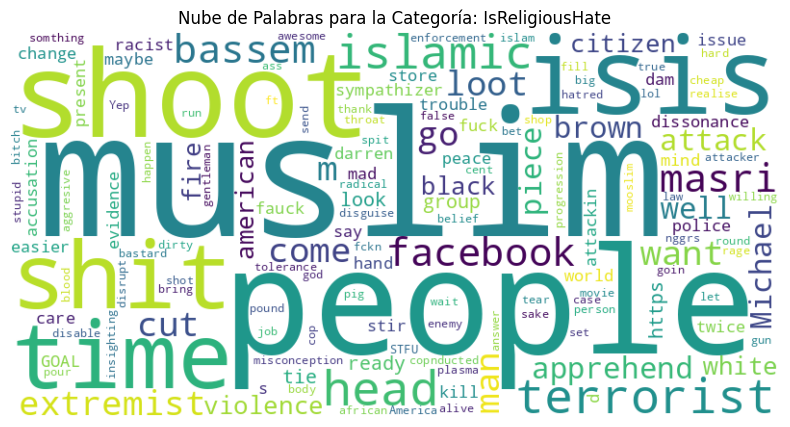

No hay datos para la categoría IsRadicalism


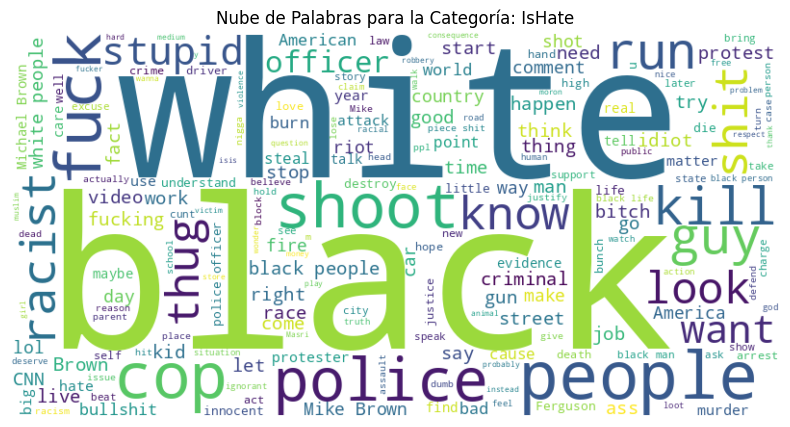

In [18]:
# Definir una función para crear una nube de palabras para una categoría específica
def create_wordcloud(category):
    # Filtrar los comentarios de la categoría deseada
    category_comments = ' '.join(df[df[category] == 1]['Lematized_comments'].apply(lambda x: ' '.join(x)))
    
    # Verificar si hay comentarios para la categoría
    if len(category_comments) > 0:
        # Crear la nube de palabras
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_comments)
        
        # Mostrar la nube de palabras
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Nube de Palabras para la Categoría: {category}')
        plt.show()
    else:
        print(f"No hay datos para la categoría {category}")

# Crear nubes de palabras para diferentes categorías
categories = ['IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism', 'IsHate']

for category in categories:
    create_wordcloud(category)

### Eliminamos la columna de comentarios tokenizados, que ya no nos aporta nada. Nos quedamos con los lematizados

In [19]:
try:
    df.drop("Tokenized_Comments", axis=1, inplace=True)
except:
    pass
df

Commnets_Length                                 Lematized_comments  \
0                122  [people, step, case, people, situation, lump, ...   
1                 16  [law, enforcement, train, shoot, apprehend, tr...   
2                 44  [not, reckon, black, life, matter, banner, hol...   
3                 52  [large, number, people, like, police, officer,...   
4                 26  [arab, dude, absolutely, right, shoot, 6, extr...   
..               ...                                                ...   
995                4                [remember, send, national, defence]   
996               29  [stat, don`t, represent, problem, race, bait, ...   
997                9     [quote, mother, ..., wow, hit, hard, accurate]   
998                2                                    [video, racist]   
999                6                    [God, narrator, annoying, lisp]   

     IsToxic  IsAbusive  IsThreat  IsProvocative  IsObscene  IsHatespeech  \
0          0          0         0              0          0             0   
1          1          1         0              0          0             0   
2          1          1         0              0          1             0   
3          0          0         0              0          0             0   
4          0          0         0              0          0             0   
..       ...        ...       ...            ...        ...           ...   
995        0          0         0              0          0             0   
996        1          0         0              0          0             1   
997        0          0         0              0          0             0   
998        0          0         0              0          0             0   
999        0          0         0              0          0             0   

     IsRacist  IsNationalist  IsSexist  IsHomophobic  IsReligiousHate  \
0           0              0         0             0                0   
1           0              0         0             0                0   
2           0              0         0             0                0   
3           0              0         0             0                0   
4           0              0         0             0                0   
..        ...            ...       ...           ...              ...   
995         0              0         0             0                0   
996         1              0         0             0                0   
997         0              0         0             0                0   
998         0              0         0             0                0   
999         0              0         0             0                0   

     IsRadicalism  IsHate Sentiment  
0               0       0  Positivo  
1               0       1   Neutral  
2               0       1  Positivo  
3               0       0  Positivo  
4               0       0  Positivo  
..            ...     ...       ...  
995             0       0   Neutral  
996             0       1  Positivo  
997             0       0  Positivo  
998             0       0   Neutral  
999             0       0  Negativo  

[1000 rows x 16 columns]

### Analisis de longitud de comentarios

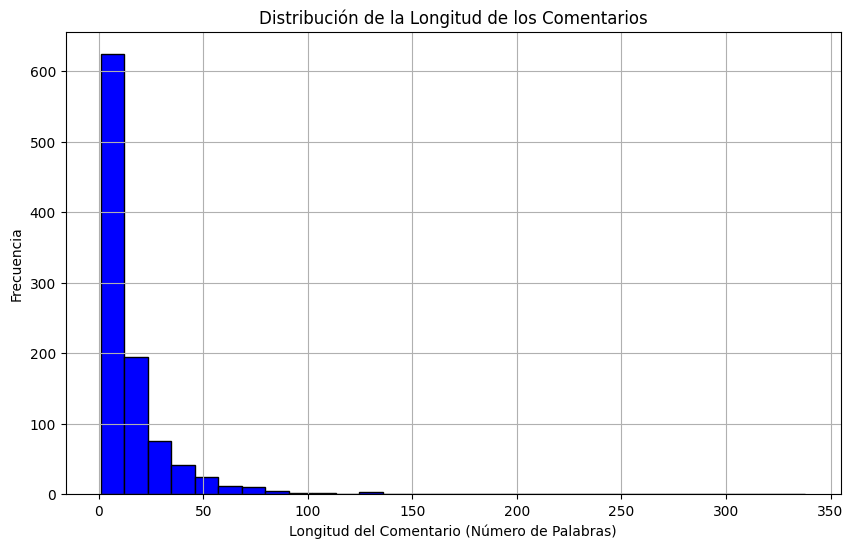

In [20]:
# Crear un histograma de la longitud de los comentarios
plt.figure(figsize=(10, 6))
plt.hist(df['Comment_Length'], bins=30, color='blue', edgecolor='black')
plt.title('Distribución de la Longitud de los Comentarios')
plt.xlabel('Longitud del Comentario (Número de Palabras)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

## Proporción de comentarios de odio con respecto al total

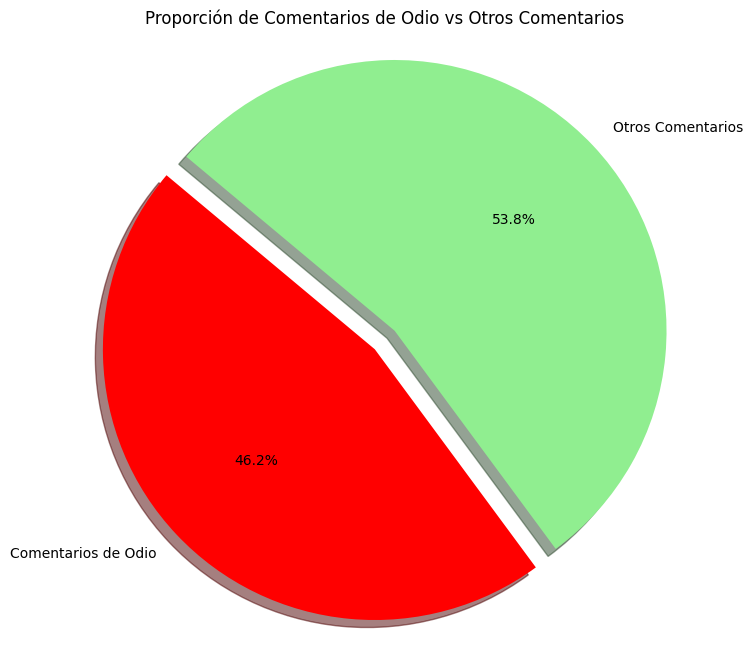

In [21]:
# Calcular la cantidad de comentarios de odio y no odio
count_hate = df['IsHate'].sum()
count_not_hate = len(df) - count_hate

# Preparar los datos para el gráfico de pastel
labels = 'Comentarios de Odio', 'Otros Comentarios'
sizes = [count_hate, count_not_hate]
colors = ['red', 'lightgreen']
explode = (0.1, 0)  # resaltar la sección de comentarios de odio

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # para que el pastel sea circular
plt.title('Proporción de Comentarios de Odio vs Otros Comentarios')
plt.show()


In [27]:
# Transformar la columna Sentiment en valores numéricos para poder procesarla posteriormente
# Asignar valores numéricos a los sentimientos
df['Sentiment'], unique = pd.factorize(df['Sentiment'])
# Mostrar los valores únicos y su mapeo numérico para referencia
print("Mapeo de Sentiment:", dict(zip(unique, range(len(unique)))))
df
try:
    df.drop("Comment_Length", axis=1, inplace=True)
except:
    pass
try:
    df.rename(columns={'Commnets_Length': 'Comments_Length'}, inplace=True)
except:
    pass
df

Mapeo de Sentiment: {0: 0, 1: 1, 2: 2}


Comments_Length                                 Lematized_comments  \
0                122  [people, step, case, people, situation, lump, ...   
1                 16  [law, enforcement, train, shoot, apprehend, tr...   
2                 44  [not, reckon, black, life, matter, banner, hol...   
3                 52  [large, number, people, like, police, officer,...   
4                 26  [arab, dude, absolutely, right, shoot, 6, extr...   
..               ...                                                ...   
995                4                [remember, send, national, defence]   
996               29  [stat, don`t, represent, problem, race, bait, ...   
997                9     [quote, mother, ..., wow, hit, hard, accurate]   
998                2                                    [video, racist]   
999                6                    [God, narrator, annoying, lisp]   

     IsToxic  IsAbusive  IsThreat  IsProvocative  IsObscene  IsHatespeech  \
0          0          0         0              0          0             0   
1          1          1         0              0          0             0   
2          1          1         0              0          1             0   
3          0          0         0              0          0             0   
4          0          0         0              0          0             0   
..       ...        ...       ...            ...        ...           ...   
995        0          0         0              0          0             0   
996        1          0         0              0          0             1   
997        0          0         0              0          0             0   
998        0          0         0              0          0             0   
999        0          0         0              0          0             0   

     IsRacist  IsNationalist  IsSexist  IsHomophobic  IsReligiousHate  \
0           0              0         0             0                0   
1           0              0         0             0                0   
2           0              0         0             0                0   
3           0              0         0             0                0   
4           0              0         0             0                0   
..        ...            ...       ...           ...              ...   
995         0              0         0             0                0   
996         1              0         0             0                0   
997         0              0         0             0                0   
998         0              0         0             0                0   
999         0              0         0             0                0   

     IsRadicalism  IsHate  Sentiment  
0               0       0          0  
1               0       1          1  
2               0       1          0  
3               0       0          0  
4               0       0          0  
..            ...     ...        ...  
995             0       0          1  
996             0       1          0  
997             0       0          0  
998             0       0          1  
999             0       0          2  

[1000 rows x 16 columns]

## Mapeo de sentimiento.
Explicación del Código:

- unique es una variable que contiene los valores únicos originales de la columna 'Sentiment' después de haber aplicado pd.factorize().
- range(len(unique)) crea una secuencia numérica que comienza en 0 y termina en len(unique) - 1, donde len(unique) es el número de elementos únicos en unique.
- zip(unique, range(len(unique))) combina estas dos secuencias en pares, donde cada valor original de 'Sentiment' se asocia con su correspondiente valor numérico.
- dict(...) convierte estos pares en un diccionario.

Interpretación y Explicación:

Mapeo de Sentiment: {0: 0, 1: 1, 2: 2} significa que cada valor único en la columna 'Sentiment' se ha asociado con un número entero, empezando desde 0.
En este caso particular, parece que los valores originales de 'Sentiment' ya eran numéricos (0, 1, 2), y la factorización simplemente ha mantenido estos mismos valores. Por lo tanto, el mapeo resultante es una correspondencia directa: 0 se mapea a 0, 1 a 1, y 2 a 2.

Cómo Explicarlo:

Puedes decir que aplicaste una factorización a la columna 'Sentiment' para convertir sus valores únicos en una secuencia de números enteros.
En este caso específico, los valores ya eran numéricos y la factorización simplemente los mantuvo iguales, lo que resultó en un mapeo directo y sin cambios de los valores.
Este paso es importante en el preprocesamiento de datos para el aprendizaje automático, ya que muchos algoritmos requieren que las entradas sean numéricas.

In [29]:
# Guarda el DataFrame en formato JSON con orientación 'split'
df.to_json('data/03_Despues_del_EDA.json', orient='split')